In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline cost new.csv')
X = df['num_pass']
y = df['cost']

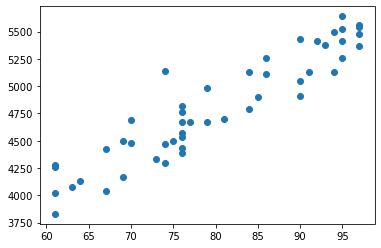

In [3]:
plt.scatter(X,y)
plt.show()

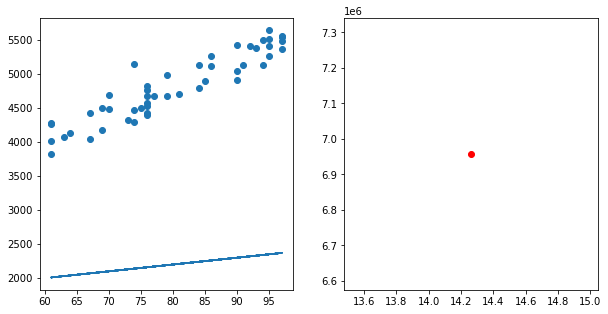

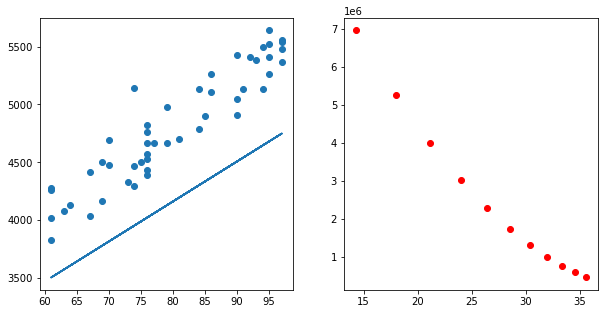

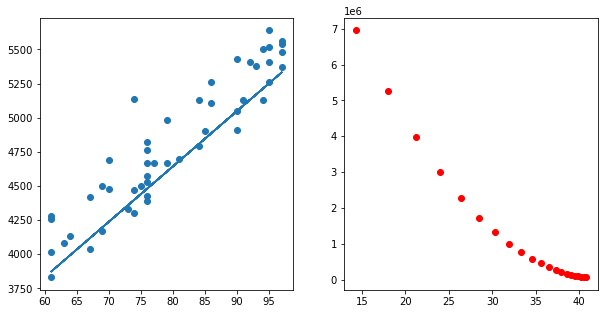

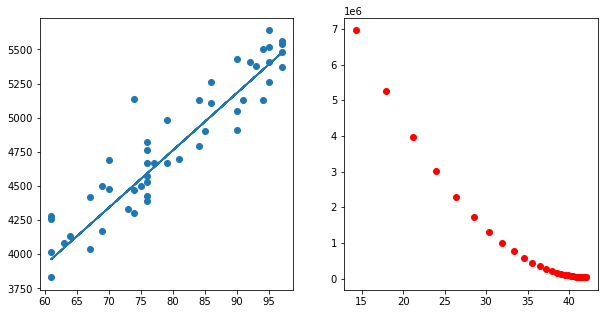

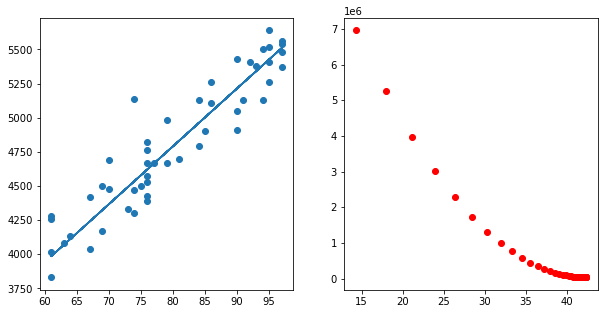

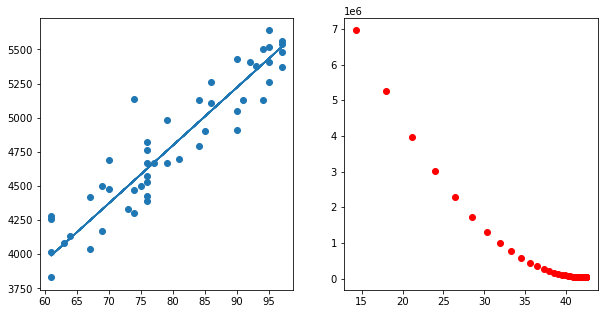

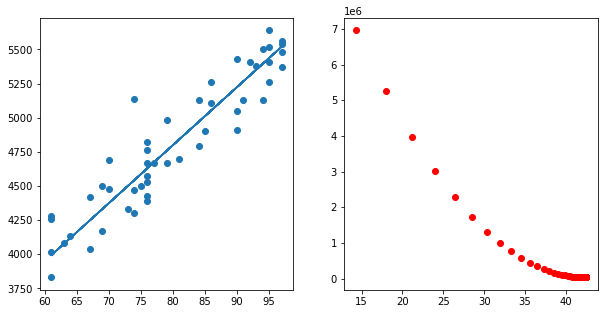

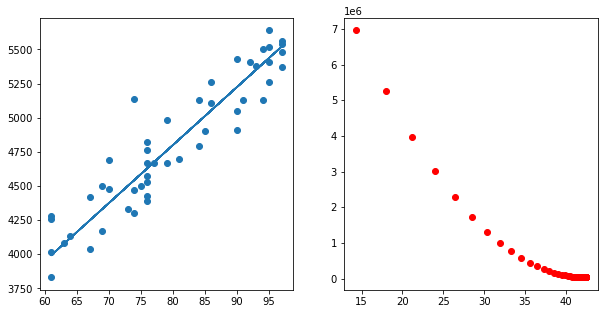

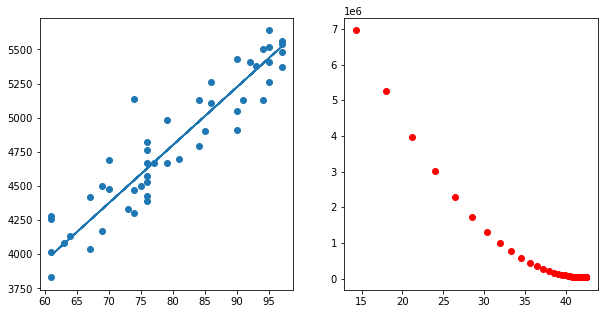

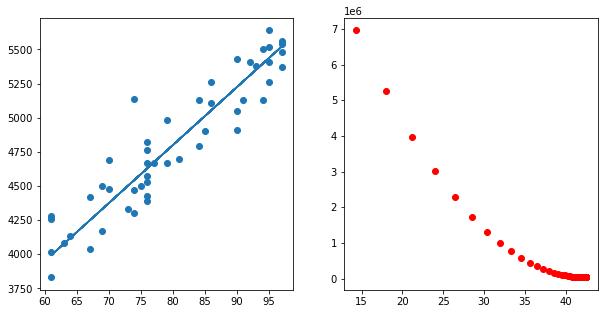

m:   42.49313847586022 c:   1400.4057319648475


In [4]:
## build gradient descent algorithm

m=10
c=1400
L = 0.00001

epochs=100
n = len(X)

xs0 = np.zeros(1000)
pl = pd.DataFrame({'xs':xs0, 'mse':xs0})
pl['mse'] = np.NaN
pl['xs'] = np.NaN

for i in range(epochs):
    y_pred = m*X + c
    D_m = (-2/n)*sum(X*(y-y_pred)) ## slope of cost wrt m
    D_c = (-2/n)*sum(y-y_pred) ## slope of cost wrt c
    m = m-L*D_m ## update m based on slope
    c = c-L*D_c ## update c based on slope
    mse = sum((y-y_pred)**2)/n
    pl.loc[i,'mse']=mse
    pl.loc[i,'xs']=m
    
    if (i%10) == 0:
        fig, ax = plt.subplots(1,2, figsize=(10,5))
        ax[0].scatter(X, y)
        ax[0].plot(X, y_pred)
        ax[1].scatter(pl['xs'], pl['mse'], color="red")        
        plt.show()
        
print ('m:  ', m, 'c:  ', c)

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

E:\anaconda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos = bos.dropna()

In [21]:
import statsmodels.api as sm
y = bos['price']
X = bos['LSTAT']

In [ ]:
## build gradient descent algorithm

m=0.5
c=10
L = 0.001
epochs=10000
n = len(X)

for i in range(epochs):
    y_pred = m*X + c
    D_m = (-2/n)*sum(X*(y-y_pred)) ## slope of cost wrt m
    D_c = (-2/n)*sum(y-y_pred) ## slope of cost wrt c
    m = m-L*D_m ## update m based on slope
    c = c-L*D_c ## update c based on slope
    
    if (i%1000) == 0:
        plt.scatter(X, y)
        plt.plot(X, y_pred, 'r')
        plt.show()
        
print ('m:  ', m, 'c:  ', c)

## Stochastic Gradient Descent

In [11]:
import statsmodels.api as sm
y = bos['price']
X = bos.drop('price', axis=1)

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (404, 13)
y_train (404,)
X_test (102, 13)
y_test (102,)


In [14]:
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [15]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 4.3926
RMSE on test set: 5.8557
